# Numerical Missing Values Imputation by Class

**We will impute numerical values by Mean or Median on the bases of related features of Class**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load dataset
df = pd.read_csv(r"/content/Train.csv")
df.head(5)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

As we can full dataset features is not showing due to defualt fixed length.
To see all the dataset, we need to set for maximum features

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df.shape

(1460, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Let's see the numerbers of missing values
df.isnull().sum().sum()

6965

In [8]:
# Let's see the percentage of missing values columns
miss_percent = df.isnull().sum()/df.shape[0]*100
miss_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [9]:
# Now we want to drop all that columns values, whose has more than 20% missing values
miss_value_clm_gre_20 = miss_percent[miss_percent > 20].keys()
miss_value_clm_gre_20

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [10]:
# Before moving ahead we should copy original dataset into new temprorary dataset
df1 = df.copy()

In [11]:
# Let's drop these columns
df1_drop_clm = df1.drop(columns = miss_value_clm_gre_20 )
df1_drop_clm.shape

(1460, 76)

In [12]:
# Now we want only impute the numerical categorical varible, let's find the numerical categories
df1_num = df1_drop_clm.select_dtypes(include=['int64','float64'])
df1_num.shape

(1460, 38)

In [13]:
df1_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [14]:
# NOw got the in 03 columns data is missing
# Now we will collect such columns and will see the missing rows
num_var_miss = ['LotFrontage','MasVnrArea','GarageYrBlt']
df1_num[num_var_miss][df1_num[num_var_miss].isnull().any(axis=1)]

LotFrontage  MasVnrArea  GarageYrBlt
7             NaN       240.0       1973.0
12            NaN         0.0       1962.0
14            NaN       212.0       1960.0
16            NaN       180.0       1970.0
24            NaN         0.0       1968.0
31            NaN         0.0       1966.0
39           65.0         0.0          NaN
42            NaN         0.0       1983.0
43            NaN         0.0       1977.0
48           33.0         0.0          NaN
50            NaN         0.0       1997.0
64            NaN       573.0       1998.0
66            NaN       287.0       1970.0
76            NaN         0.0       1956.0
78           72.0         0.0          NaN
84            NaN        22.0       1995.0
88          105.0         0.0          NaN
89           60.0         0.0          NaN
95            NaN        68.0       1993.0
99           77.0         0.0          NaN
100           NaN        28.0       1977.0
104           NaN       600.0       1951.0
108          85.0         0.0          NaN
111           NaN         0.0       2000.0
113           NaN       184.0       1953.0
116           NaN       116.0       1962.0
120           NaN         0.0       1969.0
125          60.0         0.0          NaN
126           NaN         0.0       1977.0
127          55.0         0.0          NaN
131           NaN        40.0       2000.0
133           NaN       136.0       2001.0
136           NaN       196.0       1967.0
140          70.0         0.0          NaN
147           NaN       180.0       2001.0
148          63.0       120.0          NaN
149           NaN         0.0       1936.0
152           NaN       252.0       1971.0
153           NaN         0.0       1960.0
155          60.0         0.0          NaN
160           NaN         0.0       1984.0
163          55.0         0.0          NaN
165          62.0         0.0          NaN
166           NaN         0.0       1955.0
169           NaN       653.0       1981.0
170           NaN         0.0       1991.0
177           NaN         0.0       1958.0
180           NaN       456.0       2000.0
186           NaN         0.0       1990.0
191           NaN       138.0       1972.0
198          92.0         0.0          NaN
203           NaN       205.0       2004.0
207           NaN         0.0       1960.0
208           NaN       128.0       1988.0
210          67.0         0.0          NaN
214           NaN       153.0       1977.0
218           NaN       312.0       1939.0
221           NaN         0.0       2002.0
234           NaN         NaN       2002.0
237           NaN         0.0       1993.0
241          40.0         0.0          NaN
244           NaN         0.0       1994.0
249           NaN       472.0       1958.0
250          55.0         0.0          NaN
269           NaN       174.0       1987.0
287           NaN         0.0          NaN
288           NaN        31.0       1970.0
291          55.0         0.0          NaN
293           NaN        34.0       1977.0
307           NaN         0.0          NaN
308           NaN         0.0       1961.0
310           NaN       112.0       1993.0
319           NaN       225.0       1980.0
328           NaN         0.0       1930.0
330           NaN        84.0       2002.0
335           NaN         0.0       1965.0
342           NaN       340.0       1949.0
346           NaN         0.0       1960.0
347           NaN        30.0       1960.0
351           NaN         0.0       1986.0
356           NaN       106.0       1992.0
360           NaN         0.0       1978.0
361           NaN         0.0       1940.0
364           NaN       120.0       1976.0
366           NaN       247.0       1963.0
369           NaN         0.0       1997.0
370           NaN         0.0       2000.0
375           NaN         0.0          NaN
384           NaN         0.0       1992.0
386          58.0         0.0          NaN
392           NaN         0.0       1959.0
393           NaN         0.0          NaN
404    

Now we have that certain missing values of numerical columns, but directly imputing mean or median is not solution, because we have to find the that related categorical varible, so that we could impute on the bases of that varible.

Like, we want to impute the varible "LotFrontage", now we need to check related features of "LotFrontage". After checking the dataset i saw this features "LotConfig" is have categorical values also related to "LotFrontage". So now going to impute on the bases of "LotConfig".

In [15]:
# Now let's the classes of "LotConfig"
df1['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [16]:
# Now i will check the all such row data where the inside class belongs.
df1[df1.loc[:,'LotConfig']=="Inside"]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pave   NaN      Reg   
51      52          50       RM         52.0     6240   Pave   NaN      Reg   
53      54          20       RL         68.0    50271   Pave   NaN      IR1   
54      55          80       RL         60.0     7134   Pave   NaN      Reg   
55      56          20       RL        100.0    10175   Pave   NaN      IR1   
56      57         160       FV         24.0     2645   Pave  Pave      Reg   
59      60          20       RL         60.0     7200   Pave   NaN      Reg   
60      61          20       RL         63.0    13072   Pave   NaN      Reg   
61      62          75       RM         60.0     7200   Pave   NaN      Reg   
62      63         120       RL         44.0     6442   Pave   NaN      IR1   
63      64          70       RM         50.0    10300   Pave   NaN      IR1   
64      65          60       RL          NaN     9375   Pave   NaN      Reg   
65      66          60       RL         76.0     9591   Pave   NaN      Reg   
66      67          20       RL          NaN    19900   Pave   NaN      Reg   
67      68          20       RL         72.0    10665   Pave   NaN      IR1   
70      71          20       RL         95.0    13651   Pave   NaN      IR1   
73      74          20       RL         85.0    10200   Pave   NaN      Reg   
75      76         180       RM         21.0     1596   Pave   NaN      Reg   
76      77          20       RL          NaN     8475   Pa

In [17]:
# Now i will collect only "LotFrontage" columns which belongs to "LotConfig class == Inside" belongs.
df1[df1.loc[:,'LotConfig']=="Inside"]["LotFrontage"]

0        65.0
2        68.0
5        85.0
6        75.0
8        51.0
10       70.0
11       85.0
12        NaN
13       91.0
17       72.0
18       66.0
19       70.0
21       57.0
22       75.0
23       44.0
24        NaN
27       98.0
29       60.0
30       50.0
33       70.0
34       60.0
35      108.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
44       70.0
45       61.0
47       84.0
48       33.0
49       66.0
51       52.0
53       68.0
54       60.0
55      100.0
56       24.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64        NaN
65       76.0
66        NaN
67       72.0
70       95.0
73       85.0
75       21.0
76        NaN
77       50.0
78       72.0
82       78.0
83       80.0
84        NaN
86      122.0
89       60.0
90       60.0
91       85.0
92       80.0
94       69.0
96       78.0
97       73.0
99       77.0
100       NaN
101      77.0
102      64.0
105      75.0
106      60.0
107      50.0
109     105.0
110   

In [18]:
# Now i will impute only "LotFrontage" columns which belongs to "LotConfig class == Inside" belongs.
df1[df1.loc[:,'LotConfig']=="Inside"]["LotFrontage"].replace(np.nan,df1[df1.loc[:,'LotConfig']=="Inside"]["LotFrontage"].mean() )

0        65.000000
2        68.000000
5        85.000000
6        75.000000
8        51.000000
10       70.000000
11       85.000000
12       67.715686
13       91.000000
17       72.000000
18       66.000000
19       70.000000
21       57.000000
22       75.000000
23       44.000000
24       67.715686
27       98.000000
29       60.000000
30       50.000000
33       70.000000
34       60.000000
35      108.000000
37       74.000000
38       68.000000
39       65.000000
40       84.000000
41      115.000000
44       70.000000
45       61.000000
47       84.000000
48       33.000000
49       66.000000
51       52.000000
53       68.000000
54       60.000000
55      100.000000
56       24.000000
59       60.000000
60       63.000000
61       60.000000
62       44.000000
63       50.000000
64       67.715686
65       76.000000
66       67.715686
67       72.000000
70       95.000000
73       85.000000
75       21.000000
76       67.715686
77       50.000000
78       72.000000
82       78.

**Now you can see, we have impouted only those values whose vaues belongs to " LotConfig== Inside" Class.**

Now we will run loop to impute all that class one by one, on tha bases of belonging

In [19]:
for var_class in df1['LotConfig'].unique():
  df1.update(df1[df1.loc[:,'LotConfig']==var_class]["LotFrontage"].replace(np.nan,df1[df1.loc[:,'LotConfig']==var_class]["LotFrontage"].mean() ))


In [20]:
df1.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**Now you can see "LotFrontage" has been imputed with mean values on the bases of class of "LotConfig".**

NOw let's move ahead to impute all the columns. Will check the related categorical features of all the numerical missing columns

In [39]:
# Let's copy original into new varible, because we are going to impute from start
df_copy = df.copy()
# These are the missing values columns
num_vars_miss = ['LotFrontage','MasVnrArea','GarageYrBlt']
# These are the related categorical features
cat_vars = ['LotConfig', 'MasVnrArea', 'GarageYrBlt']

# Now will inherite the both varible in same tiime, to do this, need to use ZIP
for cat_var, num_var_miss in zip(cat_vars, num_vars_miss):
  for var_class in df[cat_var].unique():
    df_copy.update(df[df.loc[:,cat_var]==var_class][num_var_miss].replace(np.nan,df[df.loc[:,cat_var]==var_class][num_var_miss].mean() ))
    


In [41]:
# Now let's check ,wheather it get's imputed or not

df_copy[num_vars_miss].columns


Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [42]:
df_copy[num_vars_miss].isnull().sum()

LotFrontage     0
MasVnrArea      8
GarageYrBlt    81
dtype: int64

Well, you can see, still we have 81 numbers of missing values.

let's check why it is still in columns

In [43]:
df_copy[df_copy[['MasVnrArea']].isnull().any(axis=1)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234    235          60       RL    67.715686     7851   Pave   NaN      Reg   
529    530          20       RL    59.911111    32668   Pave   NaN      IR1   
650    651          60       FV    65.000000     8125   Pave   NaN      Reg   
936    937          20       RL    67.000000    10083   Pave   NaN      Reg   
973    974          20       FV    95.000000    11639   Pave   NaN      Reg   
977    978         120       FV    35.000000     4274   Pave  Pave      IR1   
1243  1244          20       RL   107.000000    13891   Pave   NaN      Reg   
1278  1279          60       RL    75.000000     9473   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
936          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
973          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
977          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
234        Norm     1Fam     2Story            6            5       2002   
529        Norm     1Fam     1Story            6            3       1957   
650        Norm     1Fam     2Story            7            6       2007   
936        Norm     1Fam     1Story            7            5       2003   
973        Norm     1Fam     1Story            7            5       2007   
977        Norm   TwnhsE     1Story            7            5       2006   
1243       Norm     1Fam     1Story           10            5       2006   
1278       Norm     1Fam     2Story            8            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
234           2002     Gable  CompShg     VinylSd     VinylSd        NaN   
529           1975       Hip  CompShg     Wd Sdng       Stone        NaN   
650           2007     Gable  CompShg     CemntBd     CmentBd        NaN   
936           2003     Gable  CompShg     VinylSd     VinylSd        NaN   
973           2008     Gable  CompShg     CemntBd     CmentBd        NaN   
977           2007     Gable  CompShg     VinylSd     VinylSd        NaN   
1243          2006     Gable  CompShg     VinylSd     VinylSd        NaN   
1278          2002     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
234          NaN        Gd        TA      PConc       Gd       TA   
529          NaN        Gd        TA      PConc       TA       TA   
650          NaN        Gd        TA      PConc       Gd       TA   
936          NaN        Gd        TA      PConc       Gd       TA   
973          NaN        Gd        TA      PConc       Gd       TA   
977          NaN        Gd        TA      PConc       Gd       TA   
1243         NaN        Ex        TA      PConc       Ex       Gd   
1278         NaN        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
234            No          GLQ         625          Unf           0   
529            No          Rec        1219          Unf           0   
650            No          Unf           0          Unf           0   
936            No          GLQ         833          Unf           0   
973            No          Unf           0          Unf           0   
977            No          GLQ        1106          Unf           0   
1243           Gd          GLQ        1386          Unf           0   
1278           No          GLQ         804          Unf           0  

In [45]:
df_copy[df_copy[['GarageYrBlt']].isnull().any(axis=1)].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
39  40          90       RL         65.0     6040   Pave   NaN      Reg   
48  49         190       RM         33.0     4456   Pave   NaN      Reg   
78  79          90       RL         72.0    10778   Pave   NaN      Reg   
88  89          50  C (all)        105.0     8470   Pave   NaN      IR1   
89  90          20       RL         60.0     8070   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
39         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
48         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
78         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
88         Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   
89         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
39       Norm   Duplex     1Story            4            5       1955   
48       Norm   2fmCon     2Story            4            5       1920   
78       Norm   Duplex     1Story            4            5       1968   
88      Feedr     1Fam     1.5Fin            3            2       1915   
89       Norm     1Fam     1Story            4            5       1994   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
39          1955     Gable  CompShg     AsbShng     Plywood       None   
48          2008     Gable  CompShg     MetalSd     MetalSd       None   
78          1968       Hip  CompShg     HdBoard     HdBoard       None   
88          1982       Hip  CompShg     Plywood     Plywood       None   
89          1995     Gable  CompShg     VinylSd     VinylSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
39         0.0        TA        TA      PConc      NaN      NaN          NaN   
48         0.0        TA        TA     BrkTil       TA       TA           No   
78         0.0        TA        TA     CBlock       TA       TA           No   
88         0.0        Fa        Fa     CBlock       TA       Fa           No   
89         0.0        TA        TA      PConc       Gd       TA           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
39          NaN           0          NaN           0          0            0   
48          Unf           0          Unf           0        736          736   
78          Unf           0          Unf           0       1768         1768   
88          Unf           0          Unf           0       1013         1013   
89          GLQ         588          Unf           0        402          990   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
39    GasA        TA          N      FuseP      1152         0             0   
48    GasA        Gd          Y      SBrkr       736       716             0   
78    GasA        TA          N      SBrkr      1768         0             0   
88    GasA        TA          N      SBrkr      1013         0           513   
89    GasA        Ex          Y      SBrkr       990         0             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
39       1152             0             0         2         0             2   
48       1452             0             0         2         0             2   
78       1768             0             0         2         0             4   
88       1526             0             0         1         0             2   
89        990             1             0         1         0             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
39             2          Fa             6        Typ           0         NaN   
48             3          TA             8        Typ           0         NaN   
78             2          TA             8        Typ           0    

We got missing values because, in "MasVnrArea", there is some missing values also, that why it's not get's imputed


Similarly, same is with " GarageYrBlt" Also, this ccolumns has also missing values.

**Therefore, we need to take another columns to impute the data**





In [46]:
# Let's copy original into new varible, because we are going to impute from start
df_copy = df.copy()
# These are the missing values columns
num_vars_miss = ['LotFrontage','MasVnrArea','GarageYrBlt']
# These are the related categorical features
cat_vars = ['LotConfig', 'Exterior2nd', 'KitchenQual']

# Now will inherite the both varible in same tiime, to do this, need to use ZIP
for cat_var, num_var_miss in zip(cat_vars, num_vars_miss):
  for var_class in df[cat_var].unique():
    df_copy.update(df[df.loc[:,cat_var]==var_class][num_var_miss].replace(np.nan,df[df.loc[:,cat_var]==var_class][num_var_miss].mean() ))
    

In [47]:
df_copy[num_vars_miss].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

Here it is , no any rest missing value in those 03 columns now.

**Well, now will check, have we done imputing in proper way, to confirm that, we will plot as distribution to verify our right concept.**

## Data Distribution

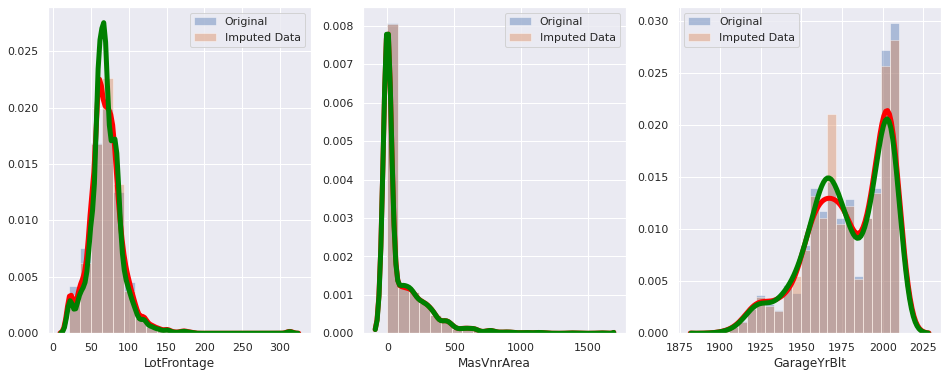

In [52]:
plt.figure(figsize=(16,6))
sns.set() # Is use to combined the style of the plot, used for styling purpose
for i, var in enumerate(num_vars_miss):
  plt.subplot(1, 3, i+1)
  sns.distplot(df[var], bins=20, kde_kws={'linewidth':5, 'color':'red'}, label='Original')
  sns.distplot(df_copy[var], bins=20, kde_kws={'linewidth':5, 'color':'green'}, label='Imputed Data')
  plt.legend()
  
  


### Median Imputation


In [54]:
# Let's copy original into new varible, because we are going to impute from start
df_copy_median = df.copy()
# These are the missing values columns
num_vars_miss = ['LotFrontage','MasVnrArea','GarageYrBlt']
# These are the related categorical features
cat_vars = ['LotConfig', 'Exterior2nd', 'KitchenQual']

# Now will inherite the both varible in same tiime, to do this, need to use ZIP
for cat_var, num_var_miss in zip(cat_vars, num_vars_miss):
  for var_class in df[cat_var].unique():
    df_copy_median.update(df[df.loc[:,cat_var]==var_class][num_var_miss].replace(np.nan,df[df.loc[:,cat_var]==var_class][num_var_miss].mean() ))
    

In [55]:
df_copy_median[num_vars_miss].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

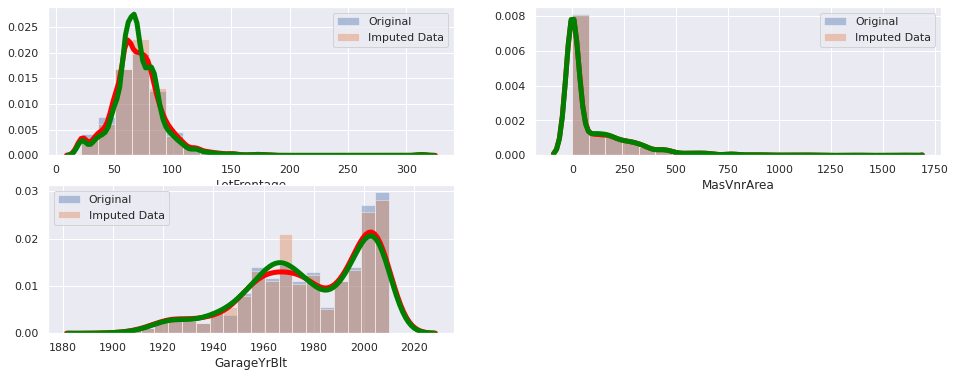

In [56]:
plt.figure(figsize=(16,6))
sns.set() # Is use to combined the style of the plot, used for styling purpose
for i, var in enumerate(num_vars_miss):
  plt.subplot(2, 2, i+1)
  sns.distplot(df[var], bins=20, kde_kws={'linewidth':5, 'color':'red'}, label='Original')
  sns.distplot(df_copy_median[var], bins=20, kde_kws={'linewidth':5, 'color':'green'}, label='Imputed Data')
  plt.legend()

### Comparison with Mean Vs Median (Distribution)

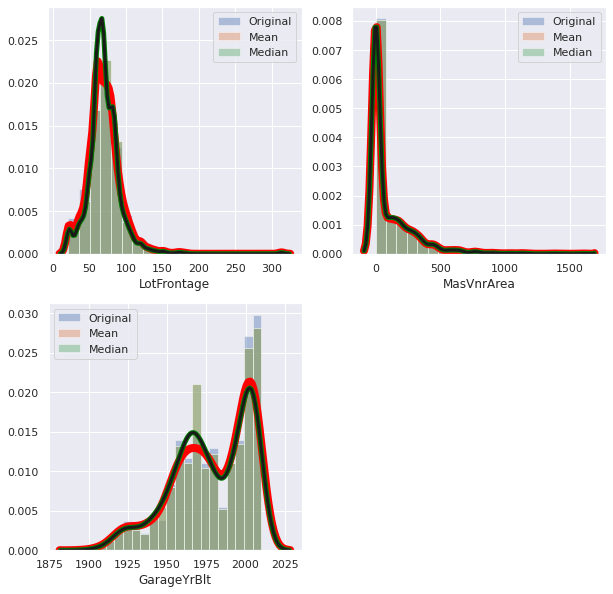

In [60]:
plt.figure(figsize=(10,10))
sns.set() # Is use to combined the style of the plot, used for styling purpose
for i, var in enumerate(num_vars_miss):
  plt.subplot(2, 2, i+1)
  sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label='Original')
  sns.distplot(df_copy[var], bins=20, kde_kws={'linewidth':5, 'color':'green'}, label='Mean')
  sns.distplot(df_copy_median[var], bins=20, kde_kws={'linewidth':3, 'color':'k'}, label='Median')
  plt.legend()

### Now let's check OutLiers
It is also important, to check outlier, that after imputation, data outliers get increased or not.

**To check Outlier, Will use BoxPlot**

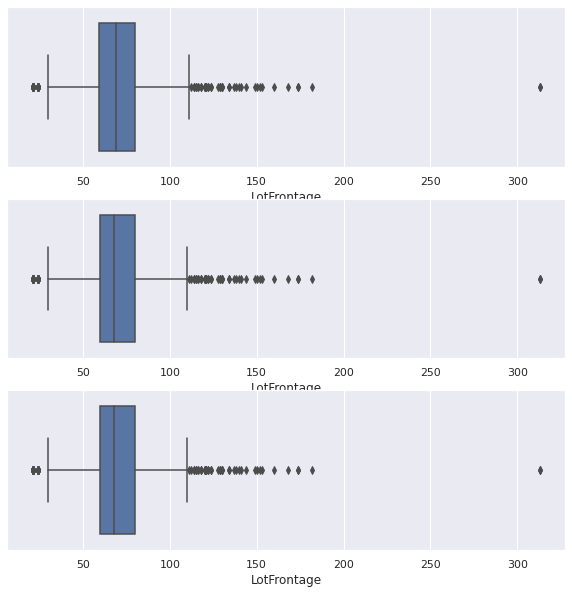

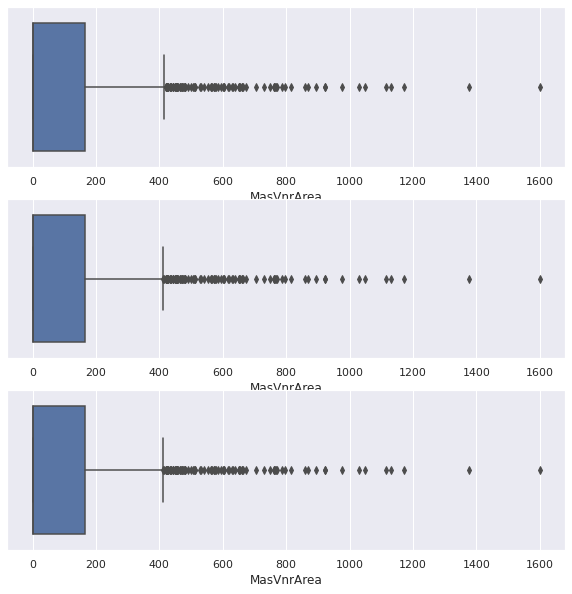

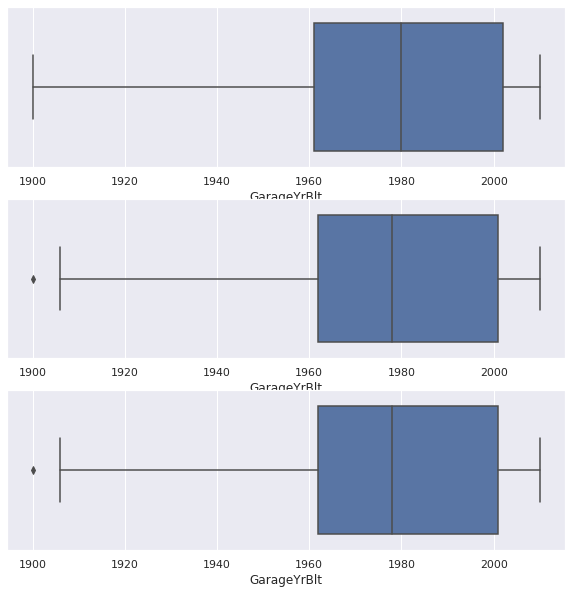

In [61]:
# If you want to check the outliers to check wheather outlier get increased or not after imputation
for i, var in enumerate(num_vars_miss):
  plt.figure(figsize=(10,10))
  plt.subplot(3, 1, 1)
  sns.boxplot(df[var])
  plt.subplot(3, 1, 2)
  sns.boxplot(df_copy[var])
  plt.subplot(3, 1, 3)
  sns.boxplot(df_copy_median[var])